# Exploring the Data

## Importing Necessary libraries

In [356]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 70)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from tqdm import tqdm_notebook as tqdm
import _pickle as pickle

### Loading the Data

In [357]:
with open("percent_df.pickle",'rb') as fp:
    pcnt_df = pickle.load(fp)

## Combining all Stock DataFrames as one

In [358]:
main_df = pd.DataFrame()

for i in tqdm(pcnt_df.keys()):
    main_df = main_df.append(pcnt_df[i], sort=False)

### Dropping the remaining NaN values

In [359]:
main_df.dropna(axis=1, inplace=True)

In [360]:
main_df.replace([np.inf, -np.inf], np.nan)
main_df.dropna(inplace=True)

#### Dropping columns with less than 100 unique values

In [361]:
for i in main_df.columns:
    if len(main_df[i].unique()) < 100:
        print("Column to drop: ", i)

Column to drop:  price_will_increase?
Column to drop:  Split factor %-increase


Dropping "Split factor %-increase" only because we need "price_will_increase?" as our dependent variable.

In [362]:
main_df.drop("Split factor %-increase", axis=1, inplace=True)

##### Final cleaning of the DataFrame

In [363]:
main_df = main_df[~main_df.isin([np.nan, np.inf, -np.inf]).any(1)]

#### Exporting final DF as a Pickle

In [364]:
with open("main_df.pickle", 'wb') as fp:
    pickle.dump(main_df, fp)

### Function to plot each feature

In [365]:
def plot_features_bar(df, col, percent_change=0):
    """
    Bar graph totaling True and False values for any column selected
    """
    if col != 'price_will_increase?':
        plt.figure(figsize=(4,3))
        plt.style.use('ggplot')

        df[df[col]>percent_change]['price_will_increase?'].value_counts().plot(kind='bar')

        plt.xticks(rotation=0)
        plt.title(f"{col} when Positive")
        plt.show()

### Plotting features 
Interpreted as how many time the price will increase when the selected feature improved over the last quarter.

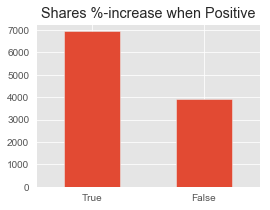

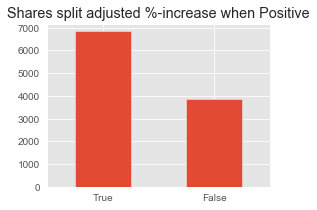

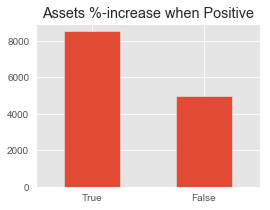

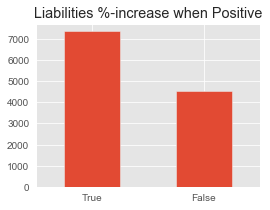

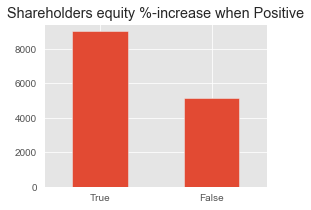

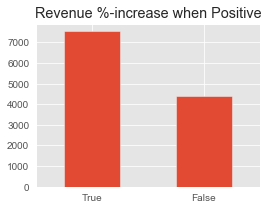

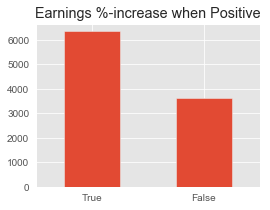

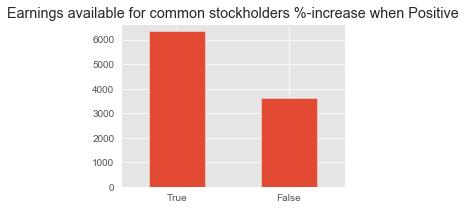

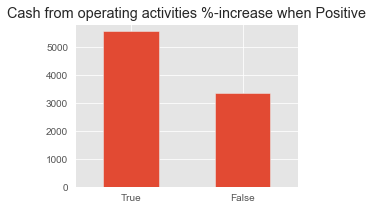

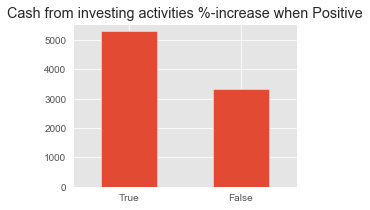

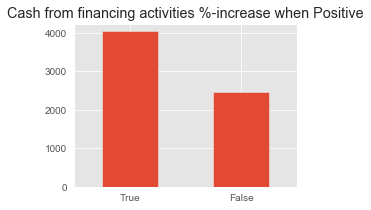

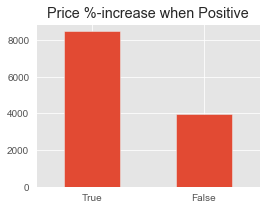

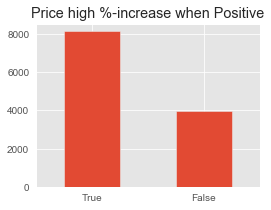

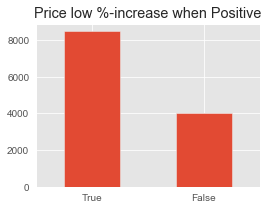

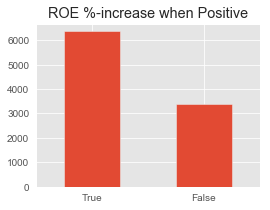

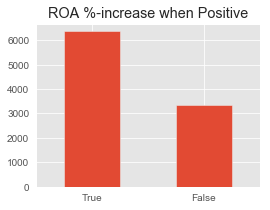

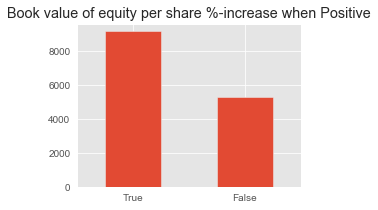

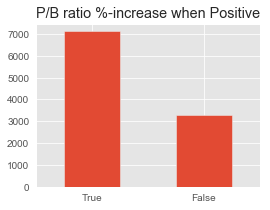

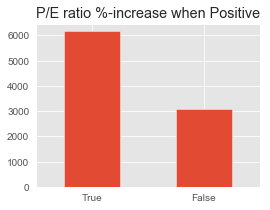

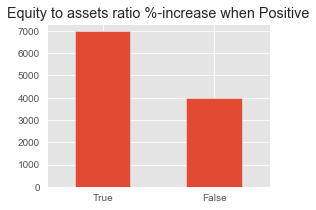

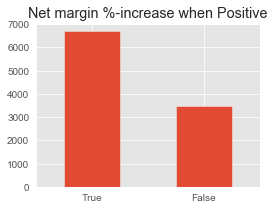

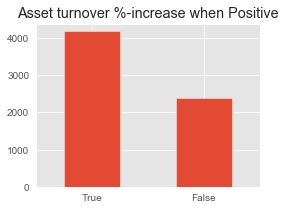

In [366]:
for i in main_df.columns:
    plot_features_bar(main_df, i)

#### Checking if increasing the positive percent change would affect the total count of increasing prices.

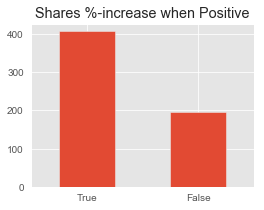

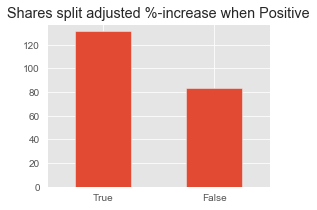

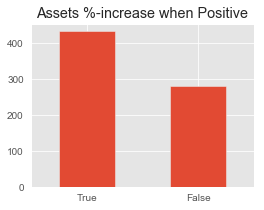

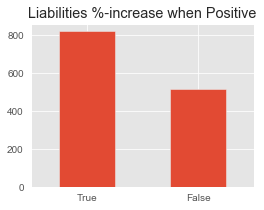

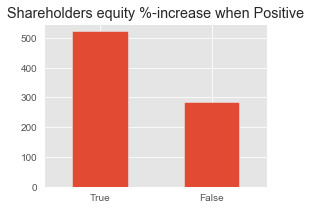

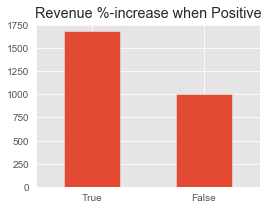

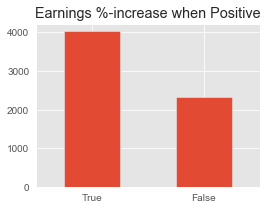

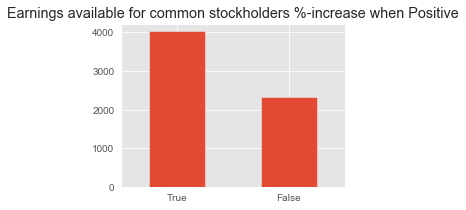

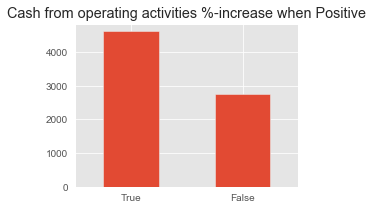

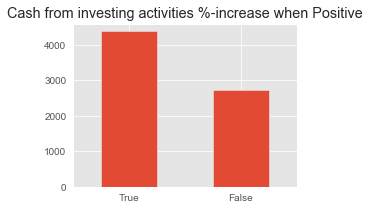

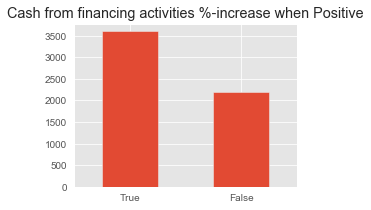

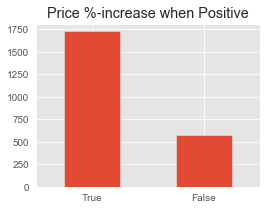

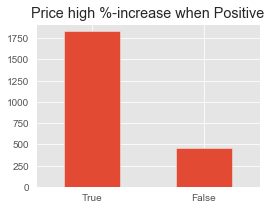

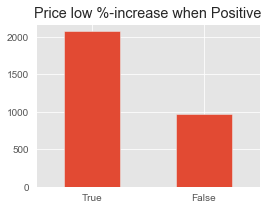

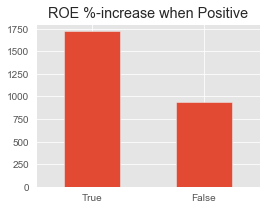

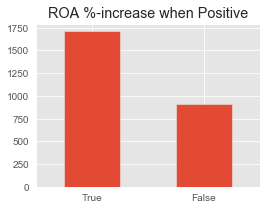

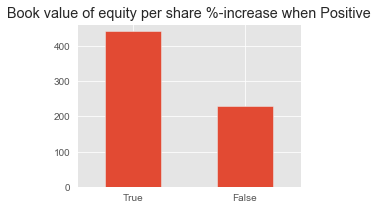

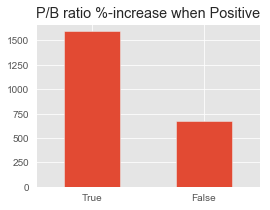

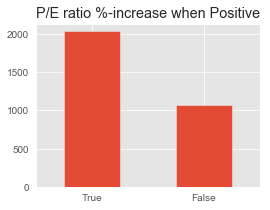

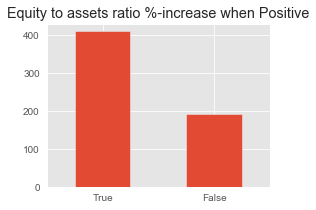

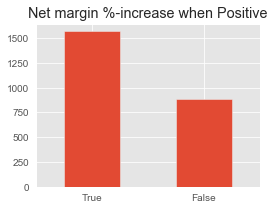

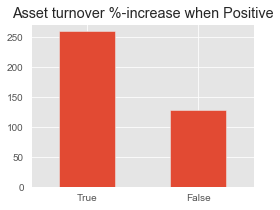

In [367]:
for i in main_df.columns:
    plot_features_bar(main_df, i, percent_change=.15)

### Correlation
Checking for any correlation between the future price outcome and the features.

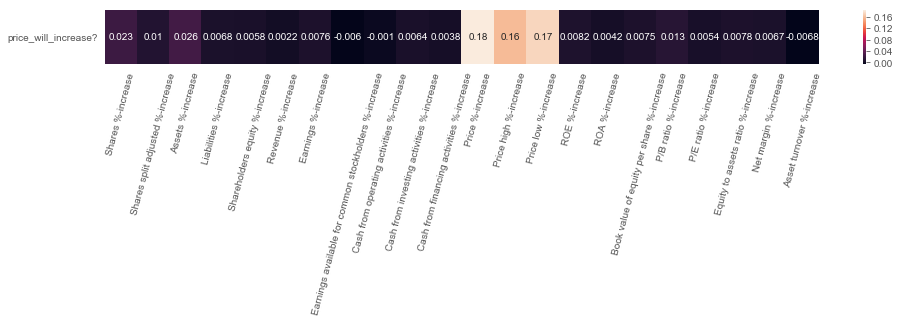

In [368]:
# Correlation DF
corr = main_df.corr().iloc[[0],1:]

#Plotting the Correlation DF as a heatmap
plt.figure(figsize=(16,1))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.show()